In [1]:
# Install kagglehub
!pip install kagglehub -q

# Set Kaggle credentials
import os
os.environ['KAGGLE_USERNAME'] = "lighthous"
os.environ['KAGGLE_KEY'] = "b7dfd0c6a4a11c7af59cb809c4564029"

# Import kagglehub and download WELFake dataset
import kagglehub

path = kagglehub.dataset_download("vcclab/welfake-dataset")
print("Dataset downloaded to:", path)

# Load CSV into pandas
import pandas as pd
import glob

csv_files = glob.glob(path + "/*.csv")
print("CSV files found:", csv_files)

df = pd.read_csv(csv_files[0])
print("Dataframe shape:", df.shape)
print("Columns:", df.columns)
df.head()

Using Colab cache for faster access to the 'welfake-dataset' dataset.
Dataset downloaded to: /kaggle/input/welfake-dataset
CSV files found: ['/kaggle/input/welfake-dataset/WELFake_Dataset.csv']
Dataframe shape: (72134, 4)
Columns: Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


**Description of the Below Code:**

This code preprocesses text data in a dataset (`df`) using **Pandas** and **NLTK** for NLP tasks. It:

1. Imports necessary libraries and downloads NLTK resources.
2. Loads English stopwords.
3. Shuffles the dataset for randomness.
4. Removes unnecessary columns and rows with missing `title` or `text`.
5. Combines `title` and `text` into a single `content` column.
6. Cleans text by lowercasing, stripping spaces, and removing punctuation.
7. Uses **POS-aware lemmatization** and removes stopwords to normalize words.
8. Applies the cleaning function to each row and prints the processed dataset shape and sample output.

In short, the below code cleans and standardizes text data for machine learning or NLP applications.


In [2]:
import pandas as pd
from sklearn.utils import shuffle
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
from nltk import pos_tag, word_tokenize

# Download all required NLTK resources (including the 'eng' variant)
for resource in ['punkt', 'punkt_tab', 'wordnet', 'omw-1.4',
                 'averaged_perceptron_tagger', 'averaged_perceptron_tagger_eng',
                 'stopwords']:
    nltk.download(resource, quiet=True)

stop_words = set(stopwords.words('english'))

# Step 0: Shuffle the dataset
df = shuffle(df, random_state=42)

# 1. Remove unnecessary columns safely
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# 2. Handle missing data
df = df.dropna(subset=['title', 'text'])

# 3. Combine text features
df['content'] = df['title'] + " " + df['text']

# 4. Text cleaning: lowercase and strip spaces
df['content'] = df['content'].str.lower().str.strip()

# 5. Remove punctuation
df['content'] = df['content'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# 6. POS-aware lemmatization with stopword removal
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    """Map NLTK POS tags to WordNet POS tags for lemmatization."""
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_text(text):
    """Tokenize, remove stopwords, POS-aware lemmatize, and return cleaned string."""
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos))
             for word, pos in pos_tag(words)
             if word not in stop_words]
    return ' '.join(words)

df['content'] = df['content'].apply(preprocess_text)

print("Preprocessing done. Dataset shape:", df.shape)
print(df.head())


Preprocessing done. Dataset shape: (71537, 4)
                                                   title  \
61370  ARNOLD SCHWARZENEGGER Sends A Message To Liber...   
2189   WOW! “We Mexicans Need To Kill Donald Trump Be...   
60609  Jimmy Carter recovers from dehydration scare i...   
51565  2 Friars’ Mission: Reviving a Brooklyn Church ...   
39431  Boy With Autism Makes His First Friend Ever An...   

                                                    text  label  \
61370                                                         1   
2189   And now a message of peace and unity from one ...      1   
60609  WINNIPEG, Manitoba (Reuters) - Former U.S. Pre...      0   
51565  The two Franciscan friars, complete with   rob...      0   
39431  Approximately 1 in 68 children has an autism s...      1   

                                                 content  
61370  arnold schwarzenegger send message liberal whi...  
2189   wow “ mexican need kill donald trump become pr...  
60609  jimmy 

**Description of the Below Code:**

This code performs **data visualization** on a preprocessed dataset (`df`) to understand text patterns and label distribution using **Matplotlib**, **Seaborn**, and **WordCloud**.

1. **Imports Libraries:** Uses `matplotlib`, `seaborn`, `Counter`, and `WordCloud` for plotting and analysis.
2. **Label Distribution:** Displays a bar chart showing the count of real (0) and fake (1) news articles.
3. **Text Length Distribution:** Plots a histogram showing how many words each article contains.
4. **Boxplot of Text Length:** Highlights outliers and the spread of text lengths.
5. **Top 15 Words:** Uses a bar plot to show the 15 most frequent words in the dataset.
6. **Length vs Label:** Creates a violin plot comparing article lengths for real and fake news.
7. **Label Proportion:** Displays a pie chart showing the percentage of fake vs real news articles.
8. **Word Clouds:** Generates separate word clouds for real and fake news to visualize commonly used words in each category.



/tmp/ipython-input-335222.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette="viridis")


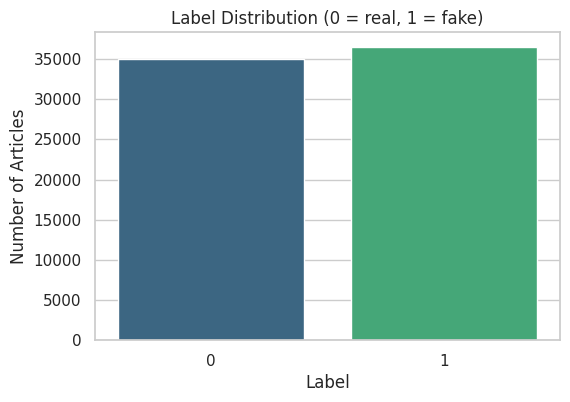

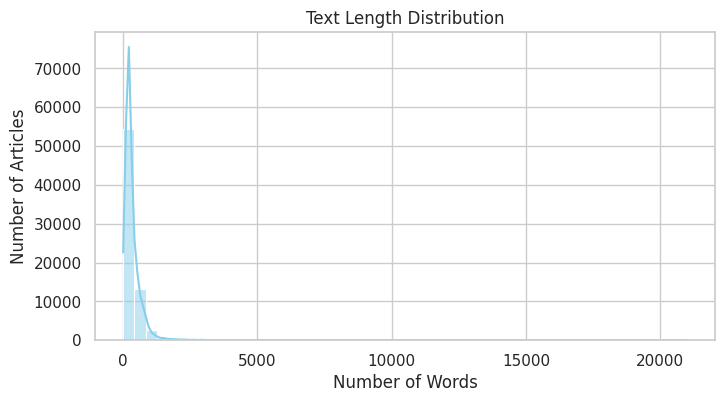

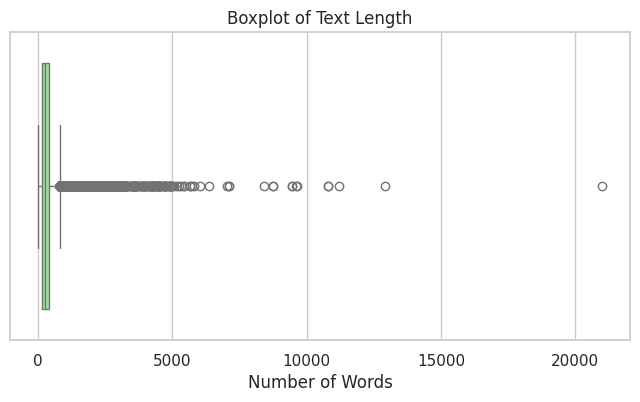

/tmp/ipython-input-335222.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="magma")


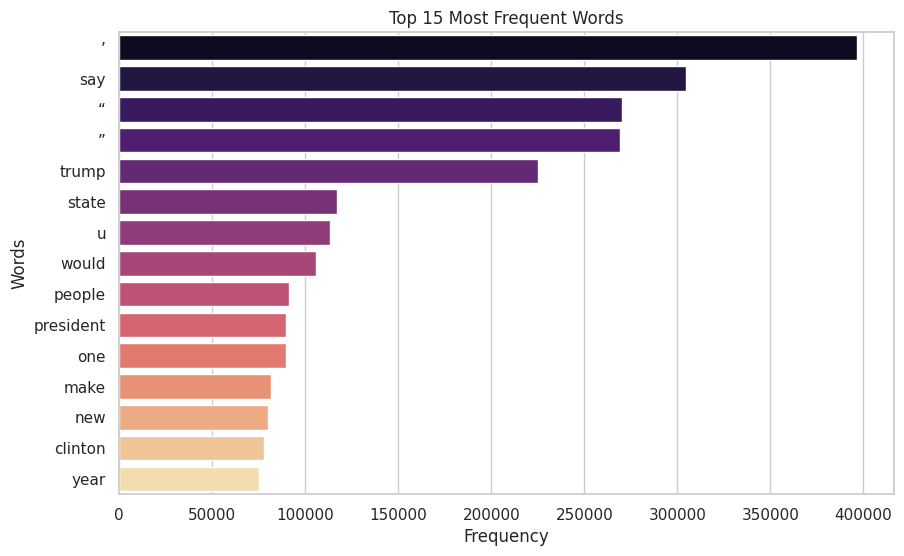

/tmp/ipython-input-335222.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='text_length', data=df, palette="coolwarm")


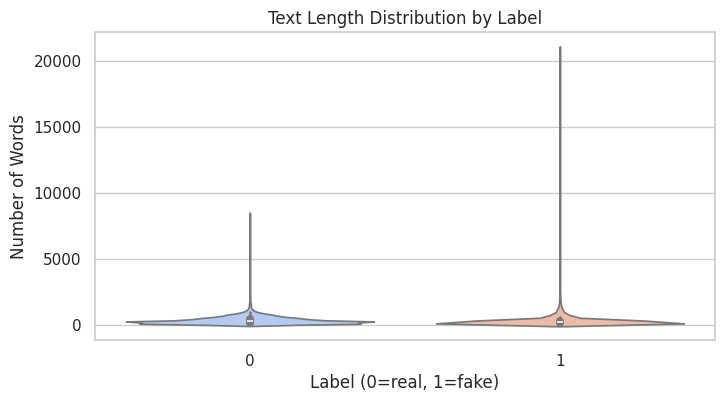

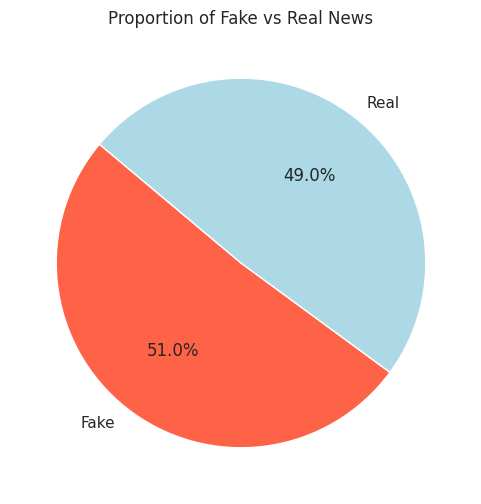

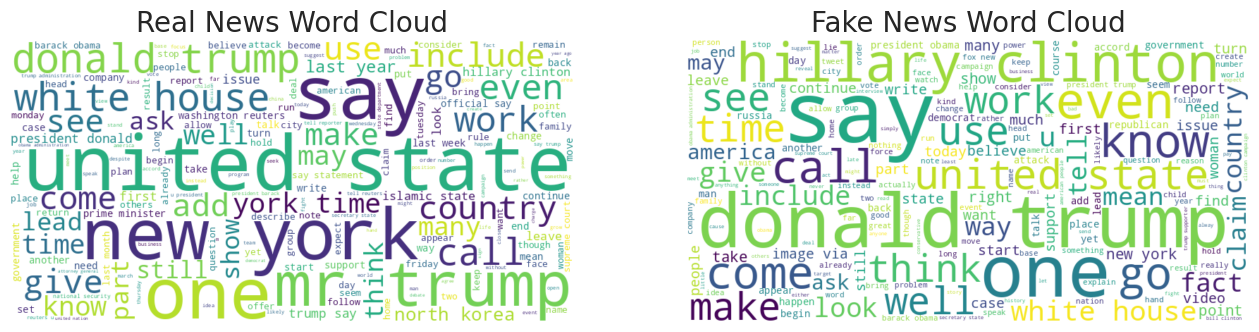

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Set style
sns.set(style="whitegrid")

# 1. Label distribution (bar plot)
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette="viridis")
plt.title("Label Distribution (0 = real, 1 = fake)")
plt.xlabel("Label")
plt.ylabel("Number of Articles")
plt.show()

# 2. Text length distribution (histogram)
df['text_length'] = df['content'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,4))
sns.histplot(df['text_length'], bins=50, kde=True, color='skyblue')
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Articles")
plt.show()

# 3. Word count boxplot (to see outliers)
plt.figure(figsize=(8,4))
sns.boxplot(x='text_length', data=df, color='lightgreen')
plt.title("Boxplot of Text Length")
plt.xlabel("Number of Words")
plt.show()

# 4. Top 15 most frequent words (bar plot)
all_words = ' '.join(df['content']).split()
word_counts = Counter(all_words)
top_words = dict(word_counts.most_common(15))
plt.figure(figsize=(10,6))
sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="magma")
plt.title("Top 15 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# 5. Article length vs label (violin plot)
plt.figure(figsize=(8,4))
sns.violinplot(x='label', y='text_length', data=df, palette="coolwarm")
plt.title("Text Length Distribution by Label")
plt.xlabel("Label (0=real, 1=fake)")
plt.ylabel("Number of Words")
plt.show()

# 6. Label proportion pie chart
label_counts = df['label'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(label_counts, labels=['Fake','Real'], autopct='%1.1f%%', colors=['tomato','lightblue'], startangle=140)
plt.title("Proportion of Fake vs Real News")
plt.show()


# 7. Wordcloud
# Separate real and fake news
real_text = " ".join(df[df['label'] == 0]['content'])
fake_text = " ".join(df[df['label'] == 1]['content'])

# Generate word clouds
real_wc = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(real_text)
fake_wc = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(fake_text)

# Plot word clouds
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.imshow(real_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Real News Word Cloud', fontsize=20)

plt.subplot(1,2,2)
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud', fontsize=20)

plt.show()

**Description for the Code below:**

This section prepares the dataset for model training by setting up libraries, splitting data, and extracting features from the cleaned text.

* **Setup and Imports:** Essential libraries for data manipulation, model training, evaluation, and visualization are imported. Warnings are suppressed for cleaner output.
* **Data Selection:** The cleaned text (`content`) and target labels (`label`) from the dataset `df` are selected for processing.
* **Data Splitting:** The dataset is split into training and testing sets using an 80/20 ratio to ensure fair evaluation across models.
* **Feature Extraction:** Two text vectorization techniques are applied:

  1. **TF-IDF Vectorization:** Converts text into weighted features that reflect the importance of each word relative to its frequency and rarity.
  2. **Count Vectorization:** Converts text into a matrix based on raw word counts, representing how often each word appears.

Both methods prepare the text data as numerical input for machine learning models such as Logistic Regression, enabling effective training and comparison between different preprocessing varieties.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import warnings

# Suppress warnings for cleaner report output
warnings.filterwarnings('ignore')

# --- Data Preparation ---
# Assuming 'df' is loaded and preprocessed from logifin.ipynb
# 'content' is the cleaned text column, 'label' is the target.
X = df['content']
y = df['label']

# --- Initial Train/Test Split (Validation Method 1) ---
# Stratified split to ensure test set represents the class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Total Training Samples: {X_train.shape[0]}, Total Testing Samples: {X_test.shape[0]}")


# --- Preprocessing Variety 1: TF-IDF Vectorization ---
# Uses Term Frequency-Inverse Document Frequency to weigh word importance.
# Includes bi-grams (two-word phrases) for better context capture.
print("\nApplying TF-IDF Vectorization...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# --- Preprocessing Variety 2: Count Vectorization ---
# Uses simple token counts. Also includes bi-grams.
print("Applying Count Vectorization...")
count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

print("Feature extraction complete.")

Total Training Samples: 57229, Total Testing Samples: 14308

Applying TF-IDF Vectorization...
Applying Count Vectorization...
Feature extraction complete.


**Code below is the Model Implementation and Evaluation**

This section trains two baseline Logistic Regression models to compare the effectiveness of TF-IDF and Count Vectorizer features:

Model 1 (TF-IDF + Logistic Regression): Uses TF-IDF features to capture the relative importance of words. The model is trained with the liblinear solver, which is efficient for binary classification. The model is evaluated on the test set using accuracy and a detailed classification report.

Model 2 (Count Vectorizer + Logistic Regression): Uses raw word counts as features. Similarly, it is trained with liblinear and evaluated on the test set.

The results allow comparison between the two preprocessing techniques, highlighting which feature extraction method better captures the patterns for distinguishing real and fake news.

In [5]:
# --- Model 1: TF-IDF + Logistic Regression (Base) ---
# Using 'liblinear' solver which is efficient for binary classification and L1/L2 penalties.
print("\n--- Model 1: TF-IDF Vectorizer (Base) Training ---")
logreg_tfidf = LogisticRegression(random_state=42, solver='liblinear')
logreg_tfidf.fit(X_train_tfidf, y_train)

# Prediction and Evaluation
y_pred_tfidf = logreg_tfidf.predict(X_test_tfidf)
print(f"Accuracy (TF-IDF Base Model) on Test Set: {accuracy_score(y_test, y_pred_tfidf):.4f}")
print("\nClassification Report (TF-IDF Base Model):\n", classification_report(y_test, y_pred_tfidf))


# --- Model 2: Count Vectorizer + Logistic Regression (Base) ---
print("\n--- Model 2: Count Vectorizer (Base) Training ---")
logreg_count = LogisticRegression(random_state=42, solver='liblinear')
logreg_count.fit(X_train_count, y_train)

# Prediction and Evaluation
y_pred_count = logreg_count.predict(X_test_count)
print(f"Accuracy (Count Base Model) on Test Set: {accuracy_score(y_test, y_pred_count):.4f}")
print("\nClassification Report (Count Base Model):\n", classification_report(y_test, y_pred_count))


--- Model 1: TF-IDF Vectorizer (Base) Training ---
Accuracy (TF-IDF Base Model) on Test Set: 0.9510

Classification Report (TF-IDF Base Model):
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      7006
           1       0.95      0.96      0.95      7302

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308


--- Model 2: Count Vectorizer (Base) Training ---
Accuracy (Count Base Model) on Test Set: 0.9494

Classification Report (Count Base Model):
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      7006
           1       0.94      0.96      0.95      7302

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308



**Below is Model 3: Explicit 5-Fold Cross-Validation (Base Model Evaluation)**

This section evaluates the base Logistic Regression model using TF-IDF features through a 5-Fold Cross-Validation process. The training data is divided into five folds, and the model is trained and validated on each fold. Weighted metrics including accuracy, F1 score, precision, and recall are calculated for every fold.

The mean and standard deviation of these metrics across all folds provide a robust estimate of the model’s performance and stability. A low standard deviation indicates that the model performs consistently across different subsets of the training data, confirming that the base Logistic Regression model is reliable and suitable as a starting point for further optimization.

In [7]:
# Evaluate the base Logistic Regression model using 5-Fold Cross-Validation with TF-IDF features
print("\nModel 3: Explicit K-Fold CV for Performance Estimate")

# Set up 5-Fold cross-validation on the training data
kfold_cv_outer = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
fold_accuracies = []
fold_f1_scores = []
fold_precisions = []
fold_recalls = []
fold_iteration = 1

# Loop through each fold to train and validate the model
for train_index, val_index in kfold_cv_outer.split(X_train_tfidf, y_train):

    # Split the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train_tfidf[train_index], X_train_tfidf[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the Logistic Regression model on the current fold
    logreg_fold = LogisticRegression(random_state=42, solver='liblinear')
    logreg_fold.fit(X_train_fold, y_train_fold)

    # Predict on the validation set and calculate weighted metrics
    y_pred_fold = logreg_fold.predict(X_val_fold)
    report = classification_report(y_val_fold, y_pred_fold, output_dict=True)

    fold_accuracies.append(accuracy_score(y_val_fold, y_pred_fold))
    fold_f1_scores.append(report['weighted avg']['f1-score'])
    fold_precisions.append(report['weighted avg']['precision'])
    fold_recalls.append(report['weighted avg']['recall'])

    print(f"Fold {fold_iteration} - Accuracy: {fold_accuracies[-1]:.4f}, F1 Score: {fold_f1_scores[-1]:.4f}")
    fold_iteration += 1

# Calculate the mean and standard deviation of metrics across all folds
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)
mean_f1 = np.mean(fold_f1_scores)
mean_precision = np.mean(fold_precisions)
mean_recall = np.mean(fold_recalls)

# Display the cross-validation evaluation report
print("Base Model Logistic Regression K-Fold CV Report")
print(f"Mean Accuracy across 5 folds: {mean_accuracy:.4f} (+/- {std_accuracy:.4f})")
print(f"Mean F1 Score across 5 folds: {mean_f1:.4f}")
print(f"Mean Precision across 5 folds: {mean_precision:.4f}")
print(f"Mean Recall across 5 folds: {mean_recall:.4f}")

# Comment on model stability based on the standard deviation of accuracy
if std_accuracy < 0.005:
    print(f"The standard deviation of accuracy ({std_accuracy:.4f}) is very low, indicating that the model's performance is robust and stable across different subsets of the training data. The base Logistic Regression model with TF-IDF features provides a reliable baseline.")
else:
    print(f"The standard deviation of accuracy ({std_accuracy:.4f}) is reasonable, indicating consistent performance. The base model is suitable and ready for further tuning.")



Model 3: Explicit K-Fold CV for Performance Estimate
Fold 1 - Accuracy: 0.9468, F1 Score: 0.9468
Fold 2 - Accuracy: 0.9443, F1 Score: 0.9443
Fold 3 - Accuracy: 0.9481, F1 Score: 0.9481
Fold 4 - Accuracy: 0.9439, F1 Score: 0.9439
Fold 5 - Accuracy: 0.9471, F1 Score: 0.9471
Base Model Logistic Regression K-Fold CV Report
Mean Accuracy across 5 folds: 0.9461 (+/- 0.0016)
Mean F1 Score across 5 folds: 0.9461
Mean Precision across 5 folds: 0.9461
Mean Recall across 5 folds: 0.9461
The standard deviation of accuracy (0.0016) is very low, indicating that the model's performance is robust and stable across different subsets of the training data. The base Logistic Regression model with TF-IDF features provides a reliable baseline.


**Below is Model 4 section**

this performs hyperparameter tuning on the Logistic Regression model using TF-IDF features. A predefined grid of C values (regularization strength) and solver options is evaluated using GridSearchCV with 5-Fold Cross-Validation. The process selects the combination of parameters that maximizes the weighted F1 score.

The best model is then evaluated on the unseen test set to measure its generalization performance. This ensures that the tuned model not only fits the training data well but also performs reliably on new, unseen articles.

In [8]:
# Perform hyperparameter tuning on Logistic Regression using TF-IDF features
print("\nModel 4: Hyperparameter Tuning with GridSearchCV")

# Use the TF-IDF features from the superior preprocessing method
X_train_tuned = X_train_tfidf
y_train_tuned = y_train

# Define the hyperparameter grid to explore different values of regularization strength and solver
param_grid = {
    'C': [0.1, 1, 10],          # Controls regularization strength
    'solver': ['liblinear', 'saga']  # Optimization algorithms
}

# Define a 5-Fold cross-validation object to validate each combination of parameters
kfold_cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV to find the best hyperparameters, optimizing for weighted F1 score
logreg_tuned = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(
    estimator=logreg_tuned,
    param_grid=param_grid,
    cv=kfold_cv_inner,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Train the model using GridSearchCV with internal 5-Fold CV
print("Starting GridSearchCV with 5-Fold Cross-Validation...")
grid_search.fit(X_train_tuned, y_train_tuned)

# Retrieve the best estimator and its parameters
best_logreg = grid_search.best_estimator_
print(f"\nBest Hyperparameters found: {grid_search.best_params_}")

# Evaluate the best tuned model on the unseen test set to assess generalization
y_pred_best = best_logreg.predict(X_test_tfidf)
print(f"\nAccuracy (Best Tuned Model) on Test Set: {accuracy_score(y_test, y_pred_best):.4f}")
print("Classification Report (Best Tuned Model):\n", classification_report(y_test, y_pred_best))



Model 4: Hyperparameter Tuning with GridSearchCV
Starting GridSearchCV with 5-Fold Cross-Validation...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best Hyperparameters found: {'C': 10, 'solver': 'saga'}

Accuracy (Best Tuned Model) on Test Set: 0.9569
Classification Report (Best Tuned Model):
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      7006
           1       0.95      0.96      0.96      7302

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308



Below is final evaluation uses the best Logistic Regression model obtained from hyperparameter tuning.

The Confusion Matrix provides a detailed breakdown of correct and incorrect predictions, showing the counts of true positives, true negatives, false positives, and false negatives.

The ROC Curve visualizes the trade-off between sensitivity (True Positive Rate) and specificity (False Positive Rate) across all decision thresholds.

The Area Under the Curve (AUC) is calculated as a robust metric of model performance. A higher AUC indicates better discrimination between real and fake news.

This comprehensive evaluation confirms the reliability and effectiveness of the final tuned model.


Confusion Matrix for the Optimal Tuned Model
[[6651  355]
 [ 261 7041]]
Interpretation:
[True Negative, False Positive]
[False Negative, True Positive]


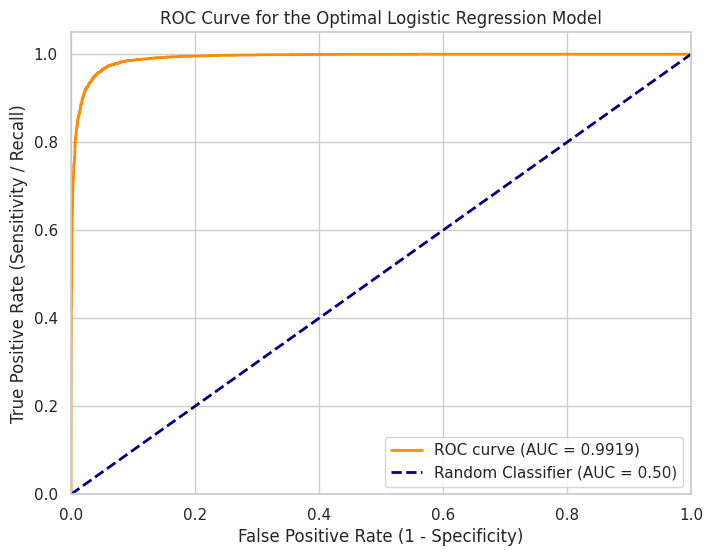

In [9]:
# Perform final evaluation for the best Logistic Regression model (best_logreg)

# Confusion Matrix provides a detailed breakdown of correct and incorrect predictions
cm = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix for the Optimal Tuned Model")
print(cm)
print("Interpretation:\n[True Negative, False Positive]\n[False Negative, True Positive]")

# Compute ROC Curve and AUC to evaluate model performance across all thresholds
# Predict probability scores for the positive class (label=1, i.e., Fake)
y_prob_best = best_logreg.predict_proba(X_test_tfidf)[:, 1]

# Calculate True Positive Rate and False Positive Rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)

# Compute Area Under the Curve
roc_auc = auc(fpr, tpr)

# Plot ROC Curve to visualize the trade-off between sensitivity and specificity
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity / Recall)')
plt.title('ROC Curve for the Optimal Logistic Regression Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
